In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime as dt

In [2]:
data = pd.read_excel('./Manufacturing Data.xlsx')
data.head()

,DATE,Product
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     577 non-null    datetime64[ns]
 1   Product  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [4]:
data.rename({'DATE':'Date','Product':'Production'},axis =1,inplace=True)

In [5]:
data.set_index('Date',inplace=True)

In [6]:
data

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


Let us use the rolling mean(SMA) in python to build model for time series

In [7]:
data['Production_3SMA'] = data['Production'].rolling(window=3).mean()

In [8]:
data

,Production,Production_3SMA
Date,,
1972-01-01,59.9622,NaN
1972-02-01,67.0605,NaN
1972-03-01,74.2350,67.085900
1972-04-01,78.1120,73.135833
1972-05-01,84.7636,79.036867
...,...,...
2019-09-01,100.1741,104.348600
2019-10-01,90.1684,97.650333
2019-11-01,79.7223,90.021600


In [9]:
#Evaluate the model
#Let us use MAPE as metric

from sklearn.metrics import mean_absolute_percentage_error

In [10]:
df = data.dropna()

In [11]:
df.head()

,Production,Production_3SMA
Date,,
1972-03-01,74.2350,67.085900
1972-04-01,78.1120,73.135833
1972-05-01,84.7636,79.036867
1972-06-01,100.5960,87.823867
1972-07-01,100.1263,95.161967


In [12]:
#The syntax for MAPE is (actual,predicted)

print(mean_absolute_percentage_error(df['Production'],df['Production_3SMA']))

0.08664685538087853


HERE I AM MAKING AN ERROR OF 8% . ANYTHING LESS THAN 10% IS OK.

# *****

# Time Series Forecasting

Aim: Using the past data related to time to predict the future data points.
    
Assumption: Past behaviour will influence the on the future behaviour.
    
Steps in forecasting 

1) Import the required package then import the data.

2) Identify the date column, and convert it into datetime64 format.

3) Convert the date column into index.

4) Check for any missing values in the data.

5) Replace missing values with (ffill or bfill)

6) Identifying the stationarity in the Series.

   * Visualisation (least recommended) 
   
   * Statistical test (ADF,KPSS) based on p-value we would conclude.
   
7) Converting stationry data into non stationary data.

   * Differencing
   
   * Transformation -log, sqrt, cbrt
   

## ARIMA model

Arima is a model which is used for time series forecasting. There is 3 major components in ARIMA modelling.

1) AR - Auto regressive Component

2) I - Integrated (How many times we are differencing to make the data Stationary.)

3) MA - Moving Average Component 

Atime series data using ARIMA modelcan be forecasted into 2 ways. Regression and Moving Average.

Regression - It is the forecasting values basrd on previous input vaues
        
        
            Y = mX + C + e 

Moving Average - It is forecasting the values based on previous residuals (Error)


           Y= m(Error(t)) + C + e (t-1) 


(p,d,q)

where p = AR

      d =I
      
      q =MA 
   (p,1,q)   

In [13]:
data = pd.read_excel('./Manufacturing Data.xlsx')
data.head()

,DATE,Product
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [14]:
data.rename({'DATE':'Date','Product':'Production'},axis =1,inplace=True)

In [15]:
data.set_index('Date',inplace=True)

In [16]:
data.head()

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [17]:
data.isnull().sum() #No missing values found.

Production    0
dtype: int64

In [18]:
#Performing the ADF test

from statsmodels.tsa.stattools import adfuller

In [19]:
results = adfuller(data['Production'])

In [20]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -1.7580087755105522
p value: 0.4014992899407569
Critical values:
 {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}
The Series is not Stationary


In [33]:
# Differencing is the concept of subtracting the current value with the previous value.

data['Production_DIFF'] = data['Production'] - data['Production'].shift(1)

In [34]:
data

,Production,Production_DIFF
Date,,
1972-01-01,59.9622,NaN
1972-02-01,67.0605,7.0983
1972-03-01,74.2350,7.1745
1972-04-01,78.1120,3.8770
1972-05-01,84.7636,6.6516
...,...,...
2019-09-01,100.1741,-2.4344
2019-10-01,90.1684,-10.0057
2019-11-01,79.7223,-10.4461


In [23]:
df1 = data.dropna()

In [24]:
df1

,Production,Production_DIFF
Date,,
1972-02-01,67.0605,7.0983
1972-03-01,74.2350,7.1745
1972-04-01,78.1120,3.8770
1972-05-01,84.7636,6.6516
1972-06-01,100.5960,15.8324
...,...,...
2019-09-01,100.1741,-2.4344
2019-10-01,90.1684,-10.0057
2019-11-01,79.7223,-10.4461


In [25]:
results = adfuller(df1['Production_DIFF'])

In [26]:
print ('Test Statistics:', results[0])
print('p value:',results[1])
print('Critical values:\n',results[4])


p_value = results[1]



if p_value < 0.05:
     print('The Series is Stationary')
else:
    print ('The Series is not Stationary')


Test Statistics: -6.627957542548436
p value: 5.811621562055151e-09
Critical values:
 {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}
The Series is Stationary


In [27]:
# To identify p and q we would plot acf graph
# When we get positive autocorrelation and significant autocorrelation we would use Auto Regressive
## When we get negative autocorrelation and significant autocorrelation we would use Moving Average

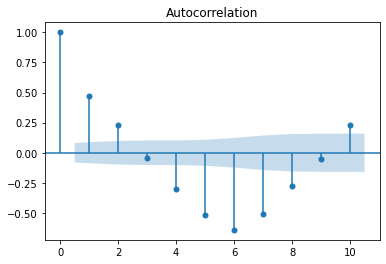

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
ACF = plot_acf(data['Production_DIFF'].dropna(),lags=10)